## Linear Regression practice by Scikit learn

In [1]:
# import package
import numpy as np
from sklearn.linear_model import LinearRegression



In [6]:
# 1차원 데이터
# x = [0,1,2,3,4,5,6,7,8,9]

# arange = array + range
x = np.arange(10)
print(x)
print(x.shape)


[0 1 2 3 4 5 6 7 8 9]
(10,)


In [7]:
# 2차원 데이터
# x.shape => (10,1)

# np.arange(10)의 결과를 shape를 재정의함
x = np.arange(10).reshape(-1,1)
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [17]:
x = np.arange(12)
print(x)
x = x.reshape(3,4)
print(x)
# 행, 렬에 있는 -1이 있으면, 정수를 기준으로 행렬이 reshape됨
x = x.reshape(-1,4)
print(x)
x = x.reshape(3,-1)
print(x)
# x = x.reshape(-1,-1)
# print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [19]:
# 직선의 방정식을 만들기 위해
# y = 2x+1에 대한 데이터셋을 만듬
# y = wx + b
x = np.arange(10).reshape(-1,1)
y = (2*x + 1).reshape(-1,1)
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]


In [24]:
# 모델 선언 (선형)
model = LinearRegression()
model


LinearRegression()

In [25]:
# 학습
# model.fit(입력, 정답) -> 기울기와 y절편을 구함
model.fit(x,y)

LinearRegression()

In [27]:
# 예측
# 학습이 끄나게 되면 이전에 학습되지 않은 x 데이터를 입력해서 예측 확인
prediction = model.predict([[10.0]])
prediction

array([[21.]])

## method for Dividing data : train_test_split()

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

# data를 분할하지만, 매칭되는 인덱스나 레이블은 유지해주는 기능

In [57]:
X = [[0,1],[2,3],[4,5],[6,7],[8,9]]
Y = [0,1,2,3,4]

# X의 전체 데이터 5개의 20%를 테스트로 설정함
# train : test = 4 : 1 
# random_state는 random seed값을 의미함 (고정한다는 의미)
# data(X)에 대해서만 train_test_split처리
X_train, X_test = train_test_split(X,test_size=0.2, random_state=123)


In [58]:
print(X_train)
print(X_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[[2, 3]]


In [59]:
# data(X)와 레이블(Y)를 함께 train_test_split 처리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [60]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[3, 4, 0, 2]
[[2, 3]]
[1]


## 당뇨병 1년후 병의 진전도 예측 모델
#### load_diabetes() in scikit-learn dataset

In [63]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [64]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [67]:
features = diabetes.feature_names
print(f"feature names : {features}")

feature names : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [68]:
# data = x, target = y
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [69]:
X = diabetes.data
Y = diabetes.target

<function matplotlib.pyplot.show(close=None, block=None)>

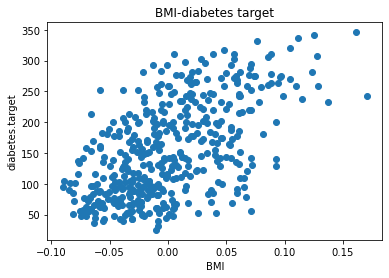

In [72]:
import matplotlib.pyplot as plt

# BMI 지수와 target의 관계 그래프 그리기
# BMI 지수는 X[2] => 3번째 인덱스
plt.scatter(X[:,2],Y)
plt.xlabel("BMI")
plt.ylabel("diabetes.target")
plt.show


In [74]:
bmi = X[:,np.newaxis,2]
print(bmi.shape)
# 0-4행까지 데이터만 확인
print(bmi[:5])

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [77]:
# 442개의 데이터를 train 데이터와 test 데이터로 나누기
from sklearn.model_selection import train_test_split

bmi_train, bmi_test, Y_train, Y_test = train_test_split(bmi, Y, test_size=0.2, random_state=123)

print(bmi_train.shape)
print(Y_train.shape)
print(bmi_test.shape)
print(Y_test.shape)


(353, 1)
(353,)
(89, 1)
(89,)


In [82]:
from sklearn.linear_model import LinearRegression

# model define
model = LinearRegression()

In [83]:
# model training
model.fit(bmi_train,Y_train)


LinearRegression()

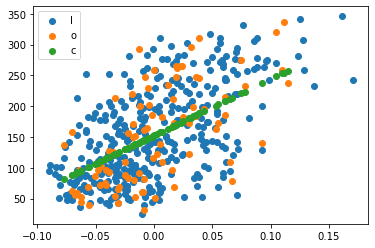

In [87]:
# confirm 

y_pred = model.predict(bmi_test)
plt.scatter(bmi_train,Y_train)
plt.scatter(bmi_test,Y_test)
plt.scatter(bmi_test,y_pred)
plt.legend("location=best")
plt.show()
